<a href="https://colab.research.google.com/github/sturu1/THU-PM/blob/master/Copy_of_4_4_1_1_%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC_%ED%81%AC%EA%B8%B0_%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [3]:
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [4]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

혹은 다음과 같이 코딩하여도 결과는 동일합니다. 

`y_train = np.array(train_labels, dtype=np.float32)`

## 훈련 검증

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어서 검증 세트를 만들어야 합니다:

In [5]:
#validation datset
x_val = x_train[:10000]
# train dataset
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
x_val.shape, y_val.shape, partial_x_train.shape, partial_y_train.shape

((10000, 10000), (10000,), (15000, 10000), (15000,))

In [7]:
from keras import models
from keras import layers
from keras import optimizers

In [8]:
# 원레 네트워크
model = models.Sequential()
model.add(layers.Dense(units=16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

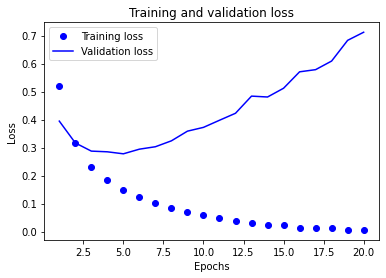

In [13]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss_origin = history.history['val_loss']

epochs = range(1, 20 + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss_origin, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # 범례를 그래프 상에 표시합니다. 

plt.show()

여기까지가 3장에서 살펴본 모델과 그 성능입니다. 
이제 더 작은 네트워크로 바꾸어 보겠습니다. 

이번에는 훨씬 큰 네트워크를 사용해 보겠습니다. 

In [17]:
model = models.Sequential()
model.add(layers.Dense(units=6, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

15000/15000 [==============================] - 1s 60us/step - loss: 0.0252 - accuracy: 0.9963 - val_loss: 0.4609 - val_accuracy: 0.8696
Epoch 20/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.0217 - accuracy: 0.9966 - val_loss: 0.4910 - val_accuracy: 0.8690


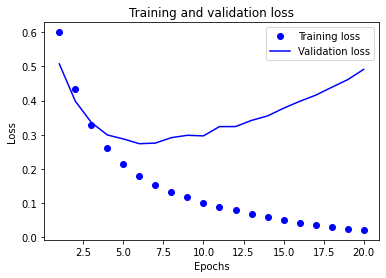

In [20]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss_small = history.history['val_loss']

epochs = range(1, 20 + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss_small, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # 범례를 그래프 상에 표시합니다. 

plt.show()

In [21]:
model = models.Sequential()


In [23]:
model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

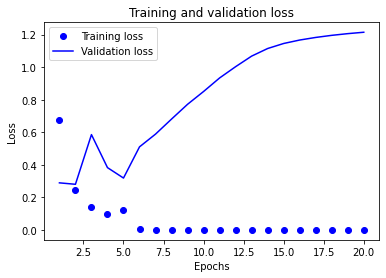

In [26]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss_large = history.history['val_loss']

epochs = range(1, 20 + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss_large, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # 범례를 그래프 상에 표시합니다. 

plt.show()

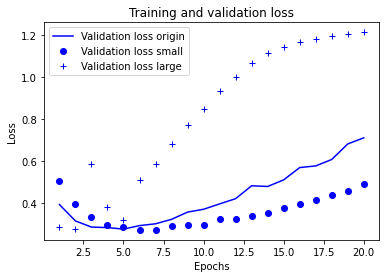

In [27]:
import matplotlib.pyplot as plt

epochs = range(1, 20 + 1)


plt.plot(epochs, val_loss_origin, 'b', label='Validation loss origin')
plt.plot(epochs, val_loss_small, 'bo', label='Validation loss small')
plt.plot(epochs, val_loss_large, 'b+', label='Validation loss large')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # 범례를 그래프 상에 표시합니다. 

plt.show()